# Források
https://www.tensorflow.org/tutorials/text/transformer

https://arxiv.org/pdf/2001.08317.pdf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataStreamPreprocessor import DataStream, Normalizer, Batcher
import matplotlib.pyplot

In [3]:
# Chose measurement pack
folder = str("../logs/20200829_16_48_48/") # 2D no Noise no Periodic yesRot

d = DataStream(folder)
print(d.data.shape)

d.keepData(0,66000)
print(d.data.shape)

(68594, 20)
(66000, 20)


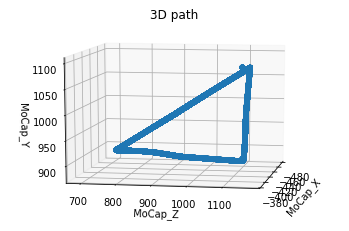

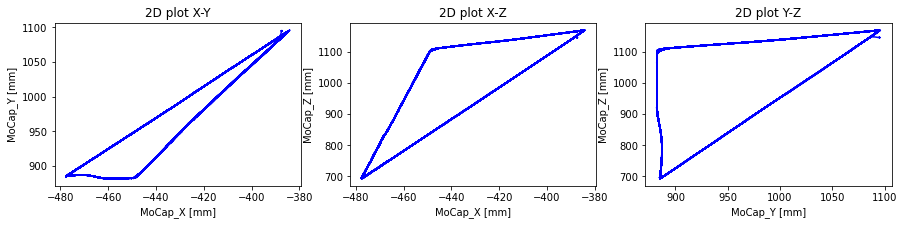

In [5]:
# Plot data
d.plotData(plot3D=True, plot2D=True)

In [7]:
d.addFeature(['diff_Timestamp', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ'])
d.showHeader()

0 - Timestamp
1 - AccX
2 - AccY
3 - AccZ
4 - GyroX
5 - GyroY
6 - GyroZ
7 - MagX
8 - MagY
9 - MagZ
10 - Marg_posX
11 - Marg_posY
12 - Marg_posZ
13 - Marg_quatX
14 - Marg_quatY
15 - Marg_quatZ
16 - Marg_quatW
17 - Marg_rotX
18 - Marg_rotY
19 - Marg_rotZ
20 - diff_Timestamp
21 - diff_Marg_posX
22 - diff_Marg_posY
23 - diff_Marg_posZ
24 - diff_Marg_posX
25 - diff_Marg_posY
26 - diff_Marg_posZ


In [8]:
# Actual input and label data for the training. The columns defined in data_const will be constat in each sequence (first value)
data = [20,1,2,3,4,5,6,7,8,9,21,22,23]
data_const = [-3,-2,-1]

label = [24,25,26]

num_layers = 2
d_model = 32
dff = 128
num_heads = 8
input_size = len(data)
target_size = len(label)
dropout_rate = 0.1

in_seq_len = 128
tar_seq_len = 2
batch_size = 64

In [9]:
d.filterData(31, 'hanning', [21, 21, 23, 24, 25, 26])

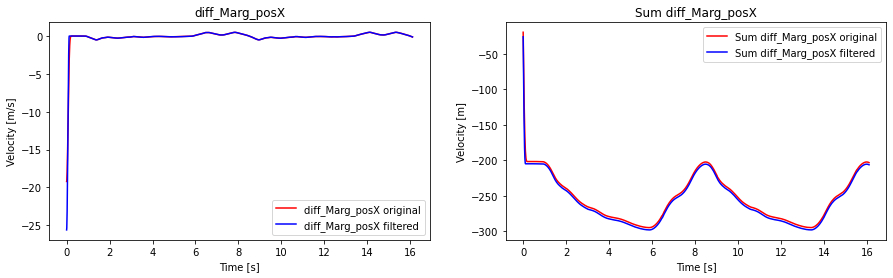

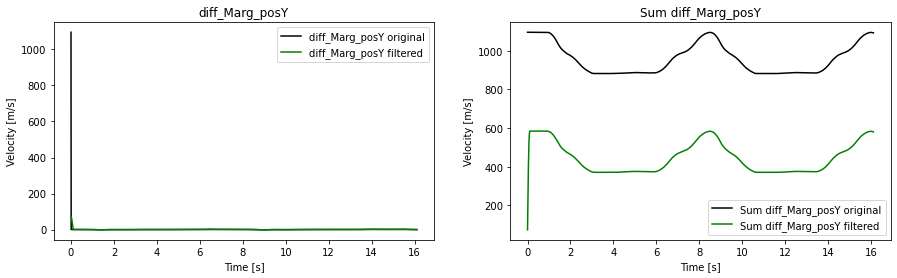

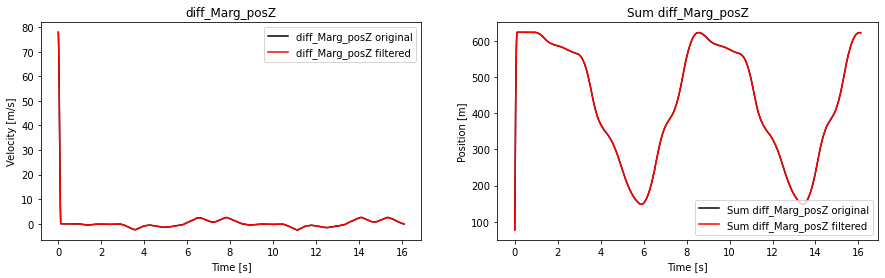

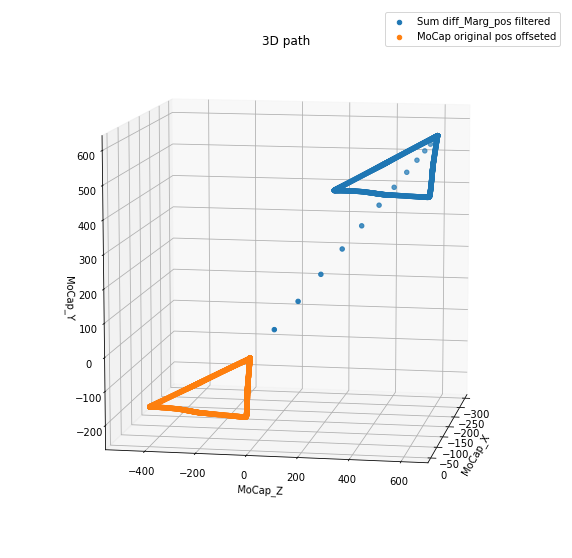

In [10]:
#plot

start = 0
end = 2000

fig, axs = plt.subplots(1, 2, figsize=(15,4))
#plt.figure(3)
axs[0].set_title("diff_Marg_posX")
axs[0].plot(d.data[start:end,0], d.data[start:end,21], color='red',  label='diff_Marg_posX original')
axs[0].plot(d.data[start:end,0], d.data[start:end,24], color='blue', label='diff_Marg_posX filtered')
axs[0].set(xlabel= 'Time [s]')
axs[0].set(ylabel='Velocity [m/s]')
axs[0].legend()

axs[1].set_title("Sum diff_Marg_posX")
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,21]), color='red',  label='Sum diff_Marg_posX original')
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,24]), color='blue', label='Sum diff_Marg_posX filtered')
axs[1].set(xlabel= 'Time [s]')
axs[1].set(ylabel='Velocity [m]')
axs[1].legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,4))
#plt.figure(3)
axs[0].set_title("diff_Marg_posY")
axs[0].plot(d.data[start:end,0], d.data[start:end,22], color='black', label='diff_Marg_posY original')
axs[0].plot(d.data[start:end,0], d.data[start:end,25], color='green', label='diff_Marg_posY filtered')
axs[0].set(xlabel= 'Time [s]')
axs[0].set(ylabel='Velocity [m/s]')
axs[0].legend()

axs[1].set_title("Sum diff_Marg_posY")
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,22]), color='black', label='Sum diff_Marg_posY original')
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,25]), color='green', label='Sum diff_Marg_posY filtered')
axs[1].set(xlabel= 'Time [s]')
axs[1].set(ylabel='Velocity [m/s]')
axs[1].legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].set_title("diff_Marg_posZ")
axs[0].plot(d.data[start:end,0], d.data[start:end,23], color='black', label='diff_Marg_posZ original')
axs[0].plot(d.data[start:end,0], d.data[start:end,26], color='red',   label='diff_Marg_posZ filtered')
axs[0].set(xlabel= 'Time [s]')
axs[0].set(ylabel='Velocity [m/s]')
axs[0].legend()

axs[1].set_title("Sum diff_Marg_posZ")
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,23]), color='black', label='Sum diff_Marg_posZ original')
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,26]), color='red',   label='Sum diff_Marg_posZ filtered')
axs[1].set(xlabel= 'Time [s]')
axs[1].set(ylabel='Position [m]')
axs[1].legend()
plt.show()

plt.figure(10,figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(np.cumsum(d.data[start:end,24]), np.cumsum(d.data[start:end,26]), np.cumsum(d.data[start:end,25]), cmap='Greens', label='Sum diff_Marg_pos filtered')
ax.scatter3D(d.data[start:end,10]-d.data[start,10], d.data[start:end,12]-d.data[start,12], d.data[start:end,11]-d.data[start,11], cmap='Greens', label='MoCap original pos offseted')
ax.set_xlabel('MoCap_X')
ax.set_ylabel('MoCap_Z')
ax.set_zlabel('MoCap_Y')
ax.set_title('3D path');
ax.view_init(10, 10)
plt.legend()
plt.show()

In [11]:
# Parsing the data
X_alap, X_header, _, _ = d.dataParser(data, [], in_seq_len)
_, _, Y_alap, Y_header = d.dataParser([], label, tar_seq_len)
Y_alap = Y_alap[in_seq_len-tar_seq_len:,:,:]

nx = Normalizer()
ny = Normalizer()

X_norm = nx.normalize(X_alap)
Y_norm = ny.normalize(Y_alap)

# Batching the data
batcher = Batcher(batch_size, shuffle=True)
X = batcher.batch(X_norm)
Y = batcher.batch(Y_norm)

# Dimension check
print('d.data: ', d.data.shape)
print('X_alap:   ', X_alap.shape, '   Y_alap: ', Y_alap.shape)
print('X_norm:   ', X_norm.shape, '   Y_norm: ', Y_norm.shape)
print('X:        ', X.shape,      ' Y:      ', Y.shape)

Arr_mess:  (66000, 27)
X_alap:    (65873, 128, 13)    Y_alap:  (65873, 2, 3)
X_norm:    (65873, 128, 13)    Y_norm:  (65873, 2, 3)
X:         (1029, 64, 128, 13)  Y:       (1029, 64, 2, 3)


In [12]:
import tensorflow as tf
import time

In [13]:
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2*(i//2))/np.float32(d_model))
    return pos*angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:,np.newaxis],
                            np.arange(d_model)[np.newaxis,:],
                            d_model)
    angle_rads[:,0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:,1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis,...]
    return tf.cast(pos_encoding, dtype=tf.float32)

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size,size)),-1,0)
    return mask


In [14]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead) 
    but it must be broadcastable for addition.

    Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
    output, attention_weights
    """
    
    matmul_qk = tf.matmul(q, k, transpose_b = True)
    
    dk = tf.cast(tf.shape(k)[-1],tf.float32)
    scaled_attention_logits = matmul_qk/tf.math.sqrt(dk)
    
    if mask is not None:
        scaled_attention_logits += (mask* -1e9) # softmax az 1esek helyen kozel vegtelen negativ inputra kozel nulla outputot ad majd
    
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    output = tf.matmul(attention_weights, v)
    
    return output, attention_weights

def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(q, k, v, None)
    print ('Attention weights are:')
    print (temp_attn)
    print ('Output is:')
    print (temp_out)

In [15]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0,2,1,3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        scaled_attention, attention_weights = scaled_dot_product_attention(q,k,v,mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0,2,1,3])
        concat_attention = tf.reshape(scaled_attention, (batch_size,-1, self.d_model))
        
        output = self.dense(concat_attention)
        
        return output, attention_weights

In [16]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation = "relu"),
        tf.keras.layers.Dense(d_model)
    ])

In [17]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model,dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x,x,x,mask)
        attn_output = self.dropout1(attn_output, training = training)
        out1 = self.layernorm1(x+attn_output)
        
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training = training)
        out2 = self.layernorm2(out1+ffn_output)
        
        return out2   

In [18]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()
        
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training, look_ahead_mask):
        attn1, attn_weights_block1 = self.mha1(x,x,x,look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1+x)
        
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, None)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2+out1)
        
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output+out2)
        
        return out3, attn_weights_block1, attn_weights_block2 

In [19]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_size, 
                maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.redimension_layer = tf.keras.layers.Conv1D(d_model,3,padding="same")
        
        self.pos_encoding = positional_encoding(maximum_position_encoding,
                                                self.d_model)
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                          for _ in range(num_layers)]
        
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]
        
        x = self.redimension_layer(x)
        
        #Maybe: x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        #x = tf.reshape(x,(-1, seq_len, self.d_model))
        x += self.pos_encoding[:, :seq_len, :]
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
            
        return x  

In [20]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_size,
                 maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.pos_encoding =positional_encoding(maximum_position_encoding, d_model)
        
        self.redimension_layer = tf.keras.layers.Conv1D(d_model,3,padding="same")
        
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                          for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training, look_ahead_mask):
        attention_weights = {}
        seq_len = tf.shape(x)[1]
        
        x = self.redimension_layer(x)
        
        #Maybe: x*=tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        #x = tf.reshape(x,(-1, seq_len, self.d_model))
        x += self.pos_encoding[:, :seq_len, :]
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                 look_ahead_mask)
            
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
        
        return x, attention_weights    

In [21]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_size, target_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_size, pe_input, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_size, pe_target, rate)
        
        self.final_layer = tf.keras.layers.Dense(target_size)
        
    def call(self, inp, tar, training, look_ahead_mask):
        enc_output = self.encoder(inp, training, None)
        
        dec_output, attention_weights = self.decoder(tar, enc_output, training,
                                                    look_ahead_mask)
        final_output = self.final_layer(dec_output)
        
        return final_output, attention_weights

In [22]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step*(self.warmup_steps ** -1.5)
        
        return tf.math.rsqrt(self.d_model)*tf.math.minimum(arg1, arg2)

In [23]:
learning_rate = CustomSchedule(d_model, warmup_steps=4000)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9,
                                     beta_2=0.98, epsilon=1e-9)

In [24]:
def loss_function(real, pred):
    return tf.reduce_mean(tf.math.square(real-pred))

train_loss = tf.keras.metrics.Mean(name='train_loss')

In [25]:
transformer = Transformer(num_layers,d_model, num_heads, dff,
                          input_size, target_size, pe_input=in_seq_len,
                         pe_target=tar_seq_len, rate=dropout_rate)

In [26]:
def create_masks(inp, tar):
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    return look_ahead_mask

In [27]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

'''
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Checkpoint restored")
''';

In [28]:
epochs = 16

In [29]:
train_step_signature =  [
    tf.TensorSpec(shape=(None, None, input_size), dtype=tf.float32),
    tf.TensorSpec(shape=(None, None, target_size), dtype=tf.float32)
    ]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:,:-1,:]
    tar_real = tar[:, 1:,:]
    
    lookahead_mask = create_masks(inp, tar_inp)
    
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp, True, lookahead_mask)
        
        loss = loss_function(tar_real, predictions)
        
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    train_loss(loss)

In [30]:
for epoch in range(epochs):
    stime = time.time()
    
    train_loss.reset_states()
    
    for batch in range(X.shape[0]):
        inp = X[batch,:,:,:]
        tar = Y[batch,:,:,:]
        train_step(inp, tar)
        
        if batch % 50 ==0:
            print('Epoch {} Batch {} Loss {:.7f}'.format(
            epoch+1, batch, train_loss.result()
            ))
    
    if (epoch+1) %5 ==0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
    print ('Epoch {} Loss {:.7f}'.format(epoch + 1, 
                                                train_loss.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - stime))
        

Epoch 1 Batch 0 Loss 3.9917805
Epoch 1 Batch 50 Loss 2.9047780
Epoch 1 Batch 100 Loss 1.6878506
Epoch 1 Batch 150 Loss 1.1876184
Epoch 1 Batch 200 Loss 0.9252583
Epoch 1 Batch 250 Loss 0.7598705
Epoch 1 Batch 300 Loss 0.6447486
Epoch 1 Batch 350 Loss 0.5593907
Epoch 1 Batch 400 Loss 0.4935158
Epoch 1 Batch 450 Loss 0.4412052
Epoch 1 Batch 500 Loss 0.3987861


KeyboardInterrupt: 

In [31]:
stime=time.time()
idx = 10000
inp = X_norm[idx].reshape((1,in_seq_len,input_size))
tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
tar_inp = tar[:,:-1,:]
tar_last = Y_alap[idx,-1,:]
lookahead_mask = create_masks(inp, tar_inp)
pred, _ = transformer(inp, tar_inp, False, lookahead_mask)
denormed = ny.denormalize_prediction(pred)[0,-1,:]
print("Predicted: ", denormed,"\n\nReal: ",tar_last)
print(time.time()-stime)

Predicted:  tf.Tensor([-0.45829678 -1.144089   -1.1091647 ], shape=(3,), dtype=float32) 

Real:  [-0.27082586 -0.96317613 -0.24558672]
0.07975101470947266


In [32]:
Xcoord = []
Ycoord = []
Zcoord = []
Xdiff = []
Ydiff = []
Zdiff = []
maxsteps = 2000
times = np.arange(maxsteps)*0.004
for idx in range(maxsteps):
    #stime = time.time()
    inp = X_norm[idx].reshape((1,in_seq_len,input_size))
    tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
    tar_inp = tar[:,:-1,:]
    tar_last = Y_alap[idx,-1,:]
    lookahead_mask = create_masks(inp, tar_inp)
    pred, _ = transformer(inp, tar_inp, False, lookahead_mask)
    denormed = ny.denormalize_prediction(pred)[0,-1,:]
    #appendtime=time.time()
    Xcoord.append(denormed[0])
    Ycoord.append(denormed[1])
    Zcoord.append(denormed[2])
    diff = denormed-tar_last
    Xdiff.append(diff[0])
    Ydiff.append(diff[1])
    Zdiff.append(diff[2])
    #print("Full: ",time.time()-stime,"  Append: ",time.time()-appendtime)

In [33]:
# Első plotnál fogjuk a kezét. Az első 2000 mintát plottolja
# A második adagnál nem fogjuk a kezét, a saját predikció van visszavezetve. Szintén az első 2000 mérés.

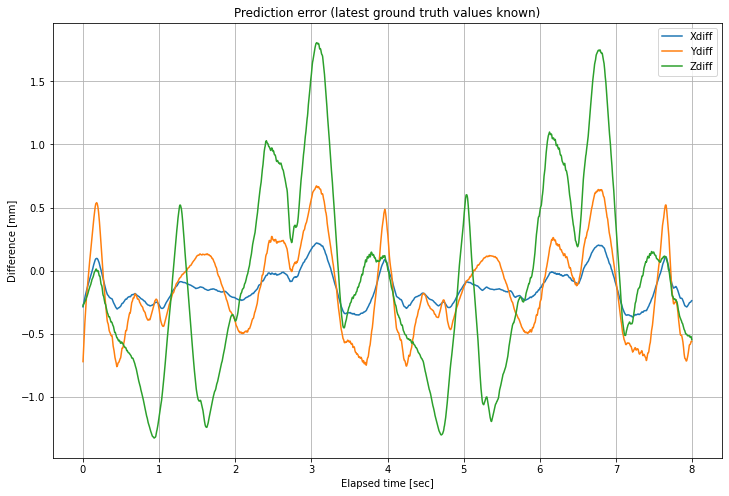

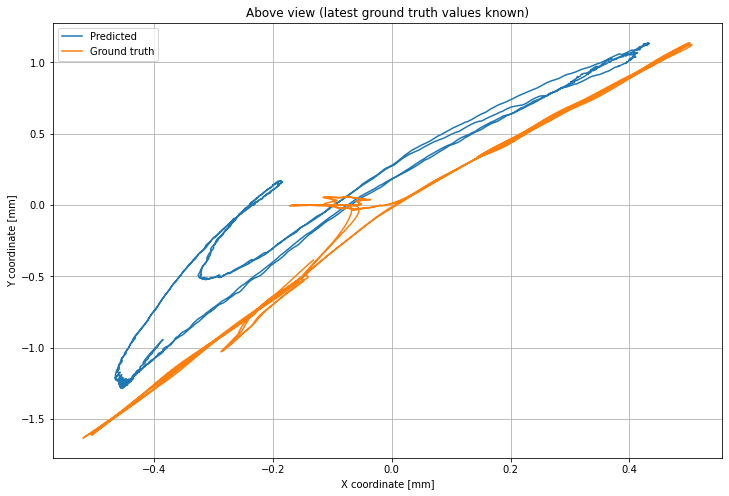

In [34]:
plt.figure(1,figsize=(12,8))
plt.title("Prediction error (latest ground truth values known)")
plt.plot(times, Xdiff)
plt.plot(times, Ydiff)
plt.plot(times, Zdiff)
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend(["Xdiff","Ydiff","Zdiff"])
plt.grid()

plt.figure(2,figsize=(12,8))
plt.title("Above view (latest ground truth values known)")
plt.plot(Xcoord, Ycoord)
plt.plot(Y_alap[:2000,-1,0],Y_alap[:2000,-1,1])
plt.ylabel("Y coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()

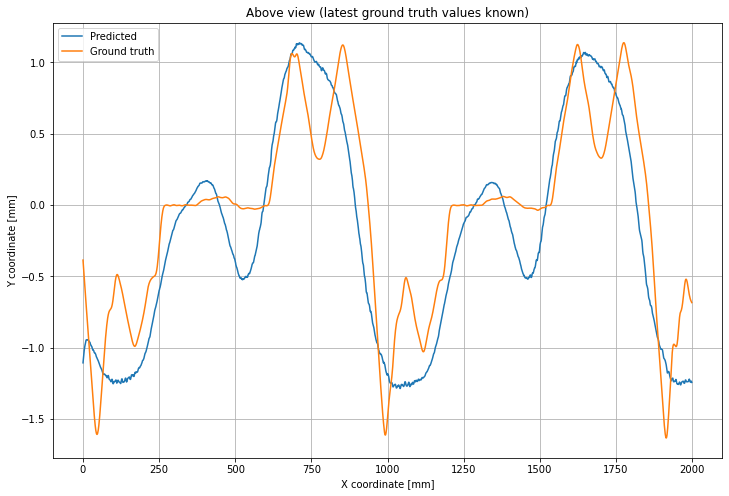

In [35]:
plt.figure(2,figsize=(12,8))
plt.title("Above view (latest ground truth values known)")
plt.plot(Ycoord[:])
plt.plot(Y_alap[:2000,-1,1])
plt.ylabel("Y coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()

In [36]:
Xcoord = []
Ycoord = []
Zcoord = []
Xdiff = []
Ydiff = []
Zdiff = []
maxsteps = 2000
idx = 0
times = np.arange(maxsteps)*0.004
tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
tar_inp = tar[:,:-1,:]
for idx in range(maxsteps):
    inp = X_norm[idx].reshape((1,in_seq_len,input_size))
    tar_last = Y_alap[idx,-1,:]
    lookahead_mask = create_masks(inp, tar_inp)
    pred, _ = transformer(inp, tar_inp, False, lookahead_mask)
    denormed = ny.denormalize_prediction(pred)[0,-1,:]
    #print(denormed.shape)
    Xcoord.append(denormed[0])
    Ycoord.append(denormed[1])
    Zcoord.append(denormed[2])
    print(tar_inp[:,-1,:])
    diff = denormed-tar_last
    if idx > 2*tar_seq_len:
        tar_inp=np.concatenate([tar_inp[:,1:,:],np.array(pred[0,-1,:]).reshape(1,1,-1)],axis=1)
    else:
        tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
        tar_inp = tar[:,:-1,:]
    Xdiff.append(diff[0])
    Ydiff.append(diff[1])
    Zdiff.append(diff[2])

[[0.56689894 0.64427966 0.47527215]]
[[0.56689894 0.64427966 0.47527215]]
[[0.5630646  0.6396472  0.47420576]]
[[0.5594052  0.6349577  0.47313944]]
[[0.5558871  0.6302442  0.47207114]]
[[0.55244863 0.62553483 0.4709957 ]]
[[0.45174763 0.5480085  0.44109285]]
[[0.4515636  0.5478315  0.43937054]]
[[0.45253617 0.5494289  0.43864354]]
[[0.4537284 0.5514    0.4380056]]
[[0.45458668 0.55288184 0.4375438 ]]
[[0.4555858 0.5545934 0.4376302]]
[[0.4559488 0.5551897 0.4373656]]
[[0.4560365  0.555301   0.43698367]]
[[0.45607403 0.5554636  0.4364721 ]]
[[0.45626983 0.5557096  0.43632653]]
[[0.45635194 0.5555909  0.436126  ]]
[[0.45663762 0.5558567  0.43608913]]
[[0.45660156 0.5556768  0.43619344]]
[[0.45644045 0.55534196 0.43622622]]
[[0.45602214 0.5549023  0.43606862]]
[[0.45576823 0.55462265 0.4358314 ]]
[[0.45546937 0.5542014  0.43549907]]
[[0.45534608 0.55391186 0.4356479 ]]
[[0.4552915  0.55372375 0.4355217 ]]
[[0.45468563 0.55240434 0.4350918 ]]
[[0.45426324 0.5516143  0.43492913]]
[[0.453878

[[0.44295877 0.5692008  0.32469395]]
[[0.44385505 0.5708036  0.3241486 ]]
[[0.44468296 0.57234794 0.32349244]]
[[0.445517   0.57409537 0.3232285 ]]
[[0.4462675  0.57571226 0.3230477 ]]
[[0.44666797 0.5773459  0.3223809 ]]
[[0.44712493 0.578654   0.32180497]]
[[0.44799554 0.58045703 0.32127   ]]
[[0.44907013 0.5825927  0.3206991 ]]
[[0.45015022 0.58436316 0.32034892]]
[[0.45114788 0.58600056 0.3198917 ]]
[[0.45172727 0.5870107  0.3189248 ]]
[[0.45225632 0.5883641  0.3181009 ]]
[[0.4526     0.5893452  0.31743538]]
[[0.45327133 0.59092367 0.3175901 ]]
[[0.45383027 0.59217244 0.31714687]]
[[0.45431572 0.5934916  0.31681618]]
[[0.454931   0.5948163  0.31579456]]
[[0.45570692 0.59677494 0.3150573 ]]
[[0.45639473 0.5981081  0.31424943]]
[[0.45720822 0.5997742  0.3136788 ]]
[[0.45808056 0.60121256 0.31305525]]
[[0.45877483 0.6029235  0.31244683]]
[[0.45955253 0.6045391  0.31205118]]
[[0.46049422 0.60628027 0.31180936]]
[[0.46117288 0.6072069  0.3110413 ]]
[[0.4617651  0.6086311  0.31058085]]
[

[[0.51612145 0.69418967 0.28045943]]
[[0.51488984 0.69293535 0.28012705]]
[[0.5140707  0.69149446 0.28023592]]
[[0.5131829  0.6899665  0.28013864]]
[[0.51247185 0.68853855 0.27992734]]
[[0.51189834 0.68753624 0.27975094]]
[[0.51120204 0.6868214  0.27919975]]
[[0.5104646  0.6859245  0.27884838]]
[[0.5096418  0.68473756 0.2790066 ]]
[[0.5092944  0.68391097 0.27937537]]
[[0.50898075 0.6833088  0.27988726]]
[[0.5083265  0.6822822  0.27978888]]
[[0.50755507 0.6810292  0.27970988]]
[[0.5067639  0.6796657  0.27976757]]
[[0.50579125 0.67803454 0.27969936]]
[[0.50522363 0.67700005 0.27948374]]
[[0.5049157  0.67632604 0.2798489 ]]
[[0.5045245 0.6756157 0.2803813]]
[[0.5042977  0.6744558  0.28051522]]
[[0.5035357  0.67315286 0.28071588]]
[[0.5021496  0.6713912  0.28060463]]
[[0.5009093  0.66999364 0.28082302]]
[[0.50046617 0.6693704  0.28099003]]
[[0.49995857 0.66829824 0.2812198 ]]
[[0.49926805 0.66699255 0.28120473]]
[[0.49881858 0.665365   0.28153306]]
[[0.4975965 0.6634806 0.2814147]]
[[0.496

[[0.7710221 0.849827  0.7723389]]
[[0.7737001  0.85165715 0.7743118 ]]
[[0.7770212 0.853969  0.7766464]]
[[0.7788459  0.85485524 0.778099  ]]
[[0.7797127 0.8543816 0.7786274]]
[[0.7801982  0.8540959  0.77884996]]
[[0.7807609  0.85429597 0.77967125]]
[[0.7823563  0.8552472  0.78105414]]
[[0.78511035 0.8570932  0.78286904]]
[[0.7870338  0.8586558  0.78450084]]
[[0.7878806  0.8589512  0.78572196]]
[[0.78878415 0.8588465  0.7870974 ]]
[[0.7899627  0.85922426 0.7883307 ]]
[[0.7913667  0.86027855 0.7896037 ]]
[[0.7915074 0.860713  0.7895522]]
[[0.7918585  0.8607202  0.78985685]]
[[0.79321605 0.862163   0.7905998 ]]
[[0.79365796 0.8625635  0.7910601 ]]
[[0.79277843 0.8618006  0.7905386 ]]
[[0.793525   0.86232936 0.79124707]]
[[0.7959346  0.8640904  0.79272217]]
[[0.7968955  0.86590666 0.7938641 ]]
[[0.79614   0.8649075 0.7941439]]
[[0.79703   0.8648062 0.7948958]]
[[0.79750305 0.86562186 0.79496294]]
[[0.7967058 0.8653986 0.7948862]]
[[0.79662997 0.86511075 0.79521275]]
[[0.79773855 0.8655934

[[0.55078083 0.6528369  0.58518904]]
[[0.54970795 0.6517374  0.5837987 ]]
[[0.5478619 0.6500473 0.5822792]]
[[0.5451581  0.6475246  0.58013767]]
[[0.5427186  0.6446597  0.57751554]]
[[0.54049134 0.6412639  0.5750498 ]]
[[0.537652  0.6376511 0.5711248]]
[[0.53490585 0.63477385 0.567435  ]]
[[0.53303665 0.63275266 0.5649782 ]]
[[0.53213537 0.63194966 0.5638731 ]]
[[0.5306426  0.6303025  0.56197625]]
[[0.5288178  0.6273469  0.55967325]]
[[0.52607214 0.62335646 0.5560046 ]]
[[0.5233693 0.6199975 0.5525575]]
[[0.52128947 0.6185518  0.55030847]]
[[0.5191743  0.61726904 0.54829854]]
[[0.51649153 0.6147862  0.5459685 ]]
[[0.51427364 0.6117377  0.5434472 ]]
[[0.511874  0.6075269 0.5392651]]
[[0.50940514 0.60369146 0.5350536 ]]
[[0.5078957 0.602123  0.5318449]]
[[0.5073047 0.602119  0.5307955]]
[[0.5057592  0.6010827  0.52986455]]
[[0.504211   0.59938145 0.5279314 ]]
[[0.5021491 0.5973904 0.5253844]]
[[0.49980742 0.59431535 0.5217784 ]]
[[0.4977513 0.5923135 0.5188569]]
[[0.4966212  0.5915525  0

[[0.42551035 0.52835166 0.35591325]]
[[0.42529368 0.52826995 0.35490295]]
[[0.42538565 0.52851325 0.35419175]]
[[0.42562988 0.5291212  0.3534899 ]]
[[0.42595452 0.52998763 0.35234395]]
[[0.42639923 0.5309452  0.35110292]]
[[0.42672387 0.5319527  0.3500298 ]]
[[0.42694074 0.5328503  0.3492201 ]]
[[0.4271489  0.5338443  0.34816754]]
[[0.4275185 0.5351078 0.3469019]]
[[0.4280123  0.53595215 0.34551904]]
[[0.42861134 0.53742206 0.34459063]]
[[0.42921162 0.53886586 0.3440477 ]]
[[0.42956823 0.5398226  0.34325412]]
[[0.42965227 0.54068625 0.34239215]]
[[0.4297297  0.54112184 0.34155133]]
[[0.43000412 0.5418705  0.34053022]]
[[0.43075714 0.5433337  0.3393112 ]]
[[0.43178922 0.54520273 0.33817548]]
[[0.43252462 0.54684854 0.33745834]]
[[0.433043   0.54778105 0.33693448]]
[[0.4330315 0.5485434 0.3361639]]
[[0.43326965 0.5494289  0.33524266]]
[[0.43375307 0.5507201  0.33421263]]
[[0.4344122  0.5521533  0.33333287]]
[[0.43495232 0.5535258  0.332689  ]]
[[0.43530846 0.55488527 0.33184037]]
[[0.435

[[0.5330915  0.714414   0.28418335]]
[[0.5329121  0.71415806 0.28482768]]
[[0.5323633  0.71380174 0.28529587]]
[[0.53148484 0.7132171  0.28530303]]
[[0.5300588 0.7119178 0.2846992]]
[[0.52906454 0.710521   0.2839363 ]]
[[0.5279051  0.70907426 0.2832467 ]]
[[0.5275008  0.70846134 0.28283563]]
[[0.5265816  0.7074209  0.28259605]]
[[0.5256084  0.7066849  0.28221717]]
[[0.5248991  0.7059365  0.28180772]]
[[0.52429664 0.7049592  0.28144112]]
[[0.5234822  0.70383877 0.28134227]]
[[0.5228784  0.70306116 0.28132173]]
[[0.5221231  0.70207876 0.28156686]]
[[0.5206188  0.7006912  0.28090826]]
[[0.5189792  0.6991081  0.28019795]]
[[0.5180313  0.697386   0.27984703]]
[[0.5176612  0.69610554 0.2798092 ]]
[[0.5171922  0.6949463  0.27944705]]
[[0.5167901  0.6942684  0.27944645]]
[[0.5157051  0.69341034 0.27919295]]
[[0.5144068  0.692286   0.27898085]]
[[0.5135084  0.6911415  0.27881178]]
[[0.5132606  0.69024605 0.27905113]]
[[0.51265585 0.68886113 0.27884856]]
[[0.5124165  0.6883013  0.27927992]]
[[0.

[[0.74489313 0.8223769  0.75988597]]
[[0.7465429 0.8231702 0.7616445]]
[[0.74793327 0.8239341  0.7632748 ]]
[[0.74880266 0.8238784  0.7642035 ]]
[[0.75061655 0.8250635  0.76577866]]
[[0.7532039  0.82681257 0.76722336]]
[[0.7564036 0.8293511 0.7696103]]
[[0.75913143 0.83143735 0.7714125 ]]
[[0.760798  0.8323485 0.7732937]]
[[0.7612552 0.8321946 0.7743001]]
[[0.7615378  0.8321451  0.77479666]]
[[0.7619335  0.83263326 0.7757888 ]]
[[0.7623018 0.8326506 0.7764251]]
[[0.7645393  0.83327436 0.7778936 ]]
[[0.7671289  0.83484083 0.7792473 ]]
[[0.7686204  0.83566153 0.78015816]]
[[0.7692604 0.8361446 0.7807538]]
[[0.77065   0.8366531 0.7819144]]
[[0.7732522  0.83893675 0.78366894]]
[[0.7755251  0.84093213 0.7850091 ]]
[[0.7761213 0.8409773 0.7853815]]
[[0.7771706  0.8413262  0.78666514]]
[[0.7778112 0.8416165 0.7873132]]
[[0.7774728  0.8415008  0.78744274]]
[[0.7771003  0.84118855 0.7870791 ]]
[[0.779534   0.84287524 0.7890934 ]]
[[0.7827776 0.8450782 0.7910086]]
[[0.7834529 0.8460899 0.7918557

[[0.5701798  0.67835003 0.60602635]]
[[0.5669149  0.6745808  0.60305464]]
[[0.5640143  0.6711481  0.60009646]]
[[0.56175524 0.6685216  0.59728986]]
[[0.55991966 0.666458   0.5940761 ]]
[[0.5585857  0.66517276 0.5922741 ]]
[[0.55687314 0.663809   0.5904692 ]]
[[0.5555945 0.6625714 0.58848  ]]
[[0.5541308  0.6609415  0.58651847]]
[[0.55322343 0.6596899  0.5847579 ]]
[[0.5521728  0.65874106 0.58306175]]
[[0.5509019  0.65721506 0.58089185]]
[[0.54859823 0.6544631  0.57859105]]
[[0.5449967 0.6500211 0.5749029]]
[[0.54169756 0.64610606 0.5716412 ]]
[[0.53945345 0.64320433 0.5686115 ]]
[[0.5381343  0.6418908  0.56650794]]
[[0.53713834 0.6404455  0.564915  ]]
[[0.53584397 0.638678   0.5633106 ]]
[[0.5336647  0.63600105 0.5606904 ]]
[[0.531158   0.63293797 0.5576369 ]]
[[0.52854234 0.62993497 0.5545712 ]]
[[0.52598464 0.6269105  0.5519829 ]]
[[0.5233058  0.62376934 0.54895717]]
[[0.5203291  0.62082124 0.54591596]]
[[0.51677245 0.6167221  0.5426555 ]]
[[0.51311296 0.6123432  0.5386264 ]]
[[0.511

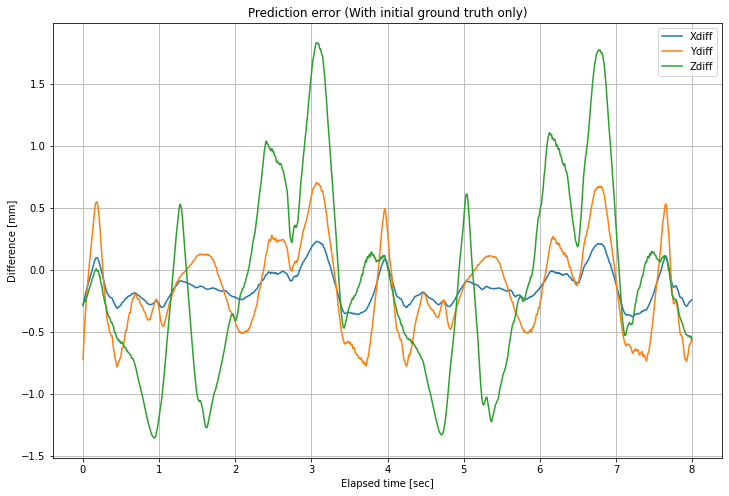

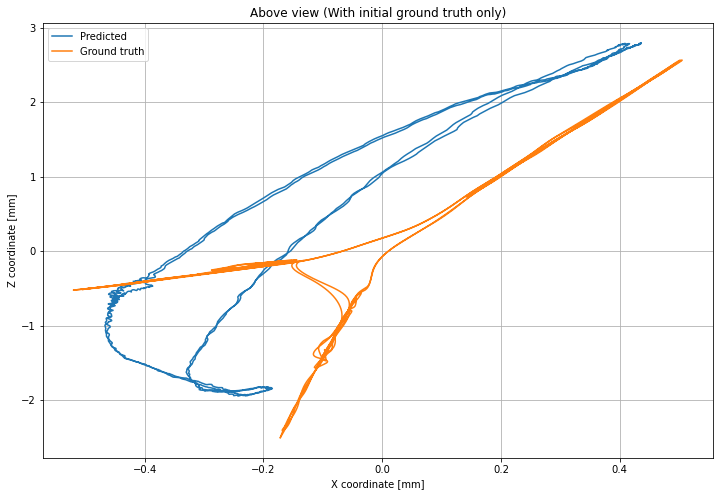

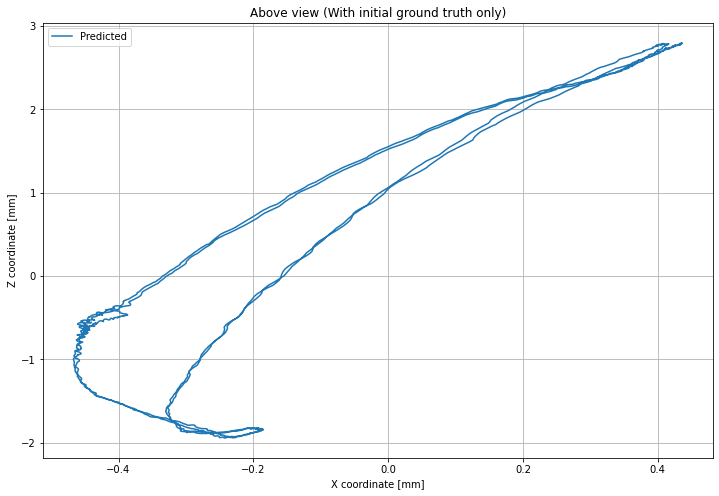

In [37]:
plt.figure(1,figsize=(12,8))
plt.title("Prediction error (With initial ground truth only)")
plt.plot(times, Xdiff)
plt.plot(times, Ydiff)
plt.plot(times, Zdiff)
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend(["Xdiff","Ydiff","Zdiff"])
plt.grid()


plt.figure(2,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Xcoord, Zcoord)
plt.plot(Y_alap[:2000,-1,0],Y_alap[:2000,-1,2])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()
plt.show()

plt.figure(3,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Xcoord, Zcoord)
#plt.plot(Y_alap[:2000,-1,0],Y_alap[:2000,-1,2])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()

In [44]:
print(len(Xcoord))
print(len(Y_alap))

2000
65873


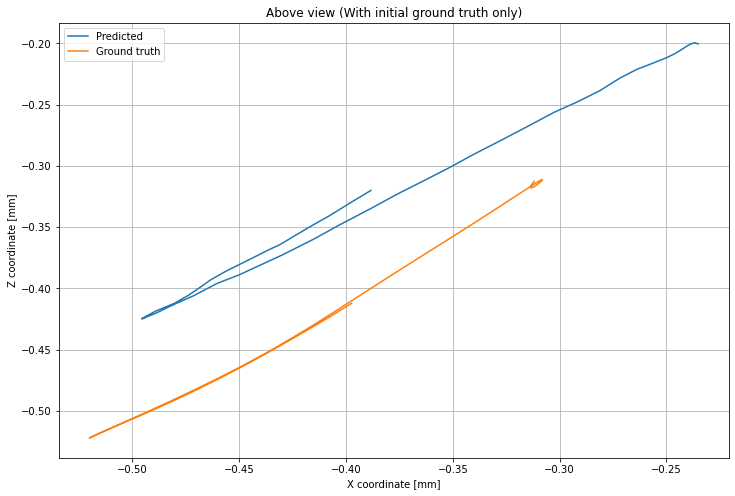

In [45]:
plt.figure(4,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Xcoord[1900:1950], Zcoord[1900:1950])
plt.plot(Y_alap[1900:1950,-1,0],Y_alap[1900:1950,-1,2])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()

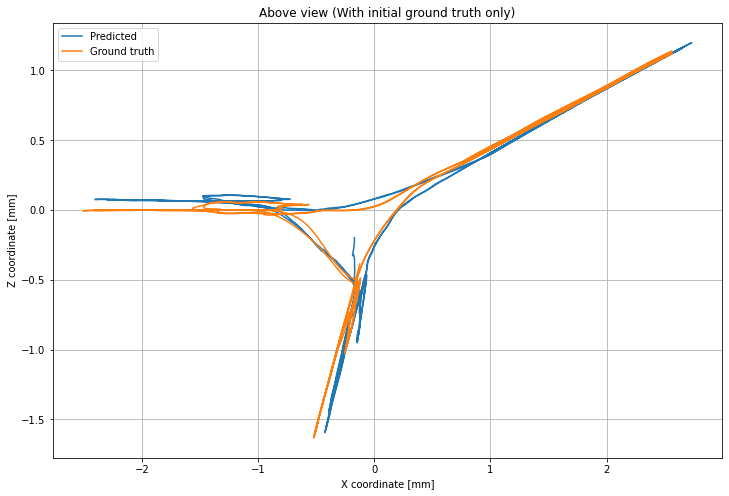

In [46]:
plt.figure(2,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Zcoord, Ycoord)
plt.plot(Y_alap[:2000,-1,2],Y_alap[:2000,-1,1])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()
plt.show()